In [63]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, r2_score


In [64]:
# خواندن داده‌ها
df = pd.read_excel('cars_data.xls')
df.head()


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [65]:
# تبدیل ویژگی‌های متنی به عددی با استفاده از LabelEncoder
le_make = LabelEncoder()
le_model = LabelEncoder()

df['Make_encoded'] = le_make.fit_transform(df['Make'])
df['Model_encoded'] = le_model.fit_transform(df['Model'])

# نمایش نگاشت برچسب‌ها
print("Make categories:", dict(zip(le_make.classes_, range(len(le_make.classes_)))))
print("\nModel categories:", dict(zip(le_model.classes_, range(len(le_model.classes_)))))


Make categories: {'Buick': 0, 'Cadillac': 1, 'Chevrolet': 2, 'Pontiac': 3, 'SAAB': 4, 'Saturn': 5}

Model categories: {'9-2X AWD': 0, '9_3': 1, '9_3 HO': 2, '9_5': 3, '9_5 HO': 4, 'AVEO': 5, 'Bonneville': 6, 'CST-V': 7, 'CTS': 8, 'Cavalier': 9, 'Century': 10, 'Classic': 11, 'Cobalt': 12, 'Corvette': 13, 'Deville': 14, 'G6': 15, 'GTO': 16, 'Grand Am': 17, 'Grand Prix': 18, 'Impala': 19, 'Ion': 20, 'L Series': 21, 'Lacrosse': 22, 'Lesabre': 23, 'Malibu': 24, 'Monte Carlo': 25, 'Park Avenue': 26, 'STS-V6': 27, 'STS-V8': 28, 'Sunfire': 29, 'Vibe': 30, 'XLR-V8': 31}


In [66]:
# رگرسیون لوجستیک برای طبقه‌بندی استفاده می‌شود
# تبدیل قیمت به دو کلاس: گران (1) و ارزان (0) بر اساس میانه
median_price = df['Price'].median()
df['Price_class'] = (df['Price'] > median_price).astype(int)

print(f"میانه قیمت: {median_price:.2f}")
print(f"\nتوزیع کلاس‌ها:")
print(df['Price_class'].value_counts())


میانه قیمت: 18025.00

توزیع کلاس‌ها:
Price_class
0    402
1    402
Name: count, dtype: int64


In [67]:
# انتخاب ویژگی‌ها و متغیر هدف
X = df[['Mileage', 'Cylinder', 'Doors', 'Make_encoded', 'Model_encoded']]
y = df['Price_class']


In [68]:
# تقسیم داده به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
# نرمال‌سازی ویژگی‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [70]:
# ساخت و آموزش مدل رگرسیون لوجستیک
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# نمایش ضرایب مدل
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_model.coef_[0]
})
print(coefficients)


         Feature  Coefficient
0        Mileage    -0.279648
1       Cylinder     2.744726
2          Doors    -0.116801
3   Make_encoded     0.248114
4  Model_encoded    -1.525220


In [71]:
# پیش‌بینی و ارزیابی مدل
y_pred = log_model.predict(X_test_scaled)

# دقت مدل
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# گزارش طبقه‌بندی
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['ارزان (0)', 'گران (1)']))


Accuracy: 0.7516

Classification Report:
              precision    recall  f1-score   support

   ارزان (0)       0.74      0.79      0.76        82
    گران (1)       0.77      0.71      0.74        79

    accuracy                           0.75       161
   macro avg       0.75      0.75      0.75       161
weighted avg       0.75      0.75      0.75       161



In [72]:
# ===== مدل رگرسیون خطی برای پیش‌بینی قیمت واقعی =====
# تقسیم داده برای پیش‌بینی قیمت
y_price = df['Price']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y_price, test_size=0.2, random_state=42)

# نرمال‌سازی
scaler_price = StandardScaler()
X_train_p_scaled = scaler_price.fit_transform(X_train_p)
X_test_p_scaled = scaler_price.transform(X_test_p)

# آموزش مدل رگرسیون خطی
price_model = LinearRegression()
price_model.fit(X_train_p_scaled, y_train_p)

# ارزیابی مدل قیمت
y_price_pred = price_model.predict(X_test_p_scaled)
mae = mean_absolute_error(y_test_p, y_price_pred)
r2 = r2_score(y_test_p, y_price_pred)

print("===== مدل پیش‌بینی قیمت (Linear Regression) =====")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.4f}")


===== مدل پیش‌بینی قیمت (Linear Regression) =====
MAE: 5751.64
R2 Score: 0.3516


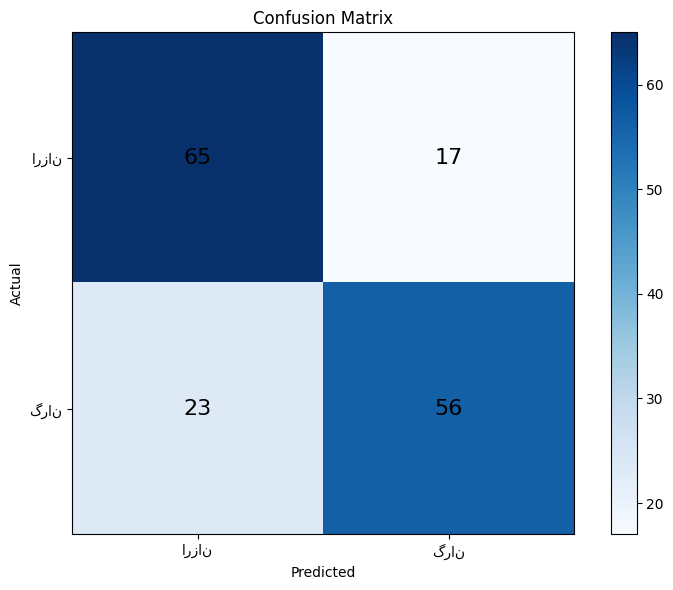

In [73]:
# ماتریس درهم‌ریختگی (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['ارزان', 'گران'])
plt.yticks([0, 1], ['ارزان', 'گران'])

# نمایش اعداد در سلول‌ها
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=16)

plt.tight_layout()
plt.show()


In [74]:
# پیش‌بینی برای یک نمونه جدید
# مثال: Mileage=5000, Cylinder=8, Doors=2, Make='Buick', Model='Century'
make_value = le_make.transform(['Buick'])[0]
model_value = le_model.transform(['Century'])[0]

sample_data = [[5000, 6, 4, make_value, model_value]]

# پیش‌بینی کلاس (گران/ارزان)
new_sample_class = scaler.transform(sample_data)
predicted_class = log_model.predict(new_sample_class)[0]
predicted_proba = log_model.predict_proba(new_sample_class)[0]

# پیش‌بینی قیمت واقعی
new_sample_price = scaler_price.transform(sample_data)
predicted_price = price_model.predict(new_sample_price)[0]

print("=" * 50)
print("نتایج پیش‌بینی برای خودرو:")
print(f"  Mileage: 5000, Cylinder: 8, Doors: 2")
print(f"  Make: Buick, Model: Century")
print("=" * 50)
print(f"\n📊 پیش‌بینی کلاس: {'گران 💰' if predicted_class == 1 else 'ارزان 💵'}")
print(f"   احتمال ارزان بودن: {predicted_proba[0]:.2%}")
print(f"   احتمال گران بودن: {predicted_proba[1]:.2%}")
print(f"\n💲 قیمت پیش‌بینی شده: ${predicted_price:,.2f}")


نتایج پیش‌بینی برای خودرو:
  Mileage: 5000, Cylinder: 8, Doors: 2
  Make: Buick, Model: Century

📊 پیش‌بینی کلاس: گران 💰
   احتمال ارزان بودن: 7.40%
   احتمال گران بودن: 92.60%

💲 قیمت پیش‌بینی شده: $25,956.91


C:\Users\R\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\R\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
